## Задача - предсказать популярность песни

по аудиофичам таким как - академические показатели, опыт работы итд.

### Шаг 1. Подготовка данных к машинному обучению.

#### 1. Импорт библиотек
#### 2. Импорт данных
#### 3. Краткий анализ данных
#### 4. Разделение данных для машинного обучения
#### 5. Скейлинг данных
#### 6. Кросс валидация

#### 1. Импорт библиотек

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
import optuna

#### 2. Импорт данных

In [32]:
df_songs = pd.read_csv('song_data.csv')

#### 3. Краткий анализ данных

In [33]:
df_songs.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [34]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [35]:
X = df_songs.drop(['song_popularity'], axis=1)
y = df_songs['song_popularity']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print(len(df_songs.columns) -1)

14


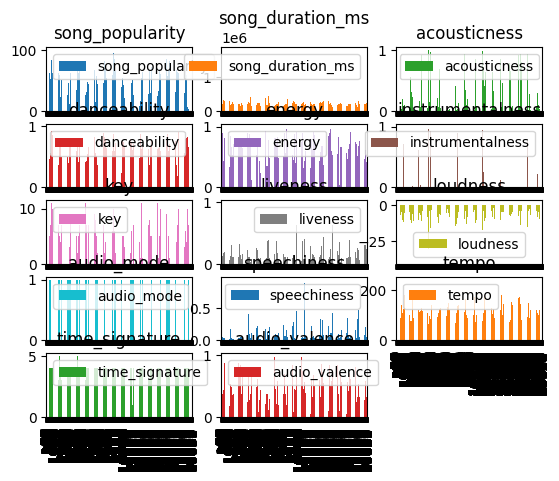

In [8]:
df_songs.plot(kind = 'bar', subplots = True, layout=(5,3))
plt.show()

#### Ни 1 фича не следует нормальному распределению, нужно использовать MinMaxScaler()

In [38]:
df_songs.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

#### 4. Разделение данных для машинного обучения

In [39]:
X_train_encoded = preprosses.fit_transform(X_train)
X_test_encoded = preprosses.transform(X_test)

#### 5. Скейлинг данных

In [40]:
numerical = ['song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence']

preprosses = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['song_name']),
        ('num', MinMaxScaler(), numerical),
    ]
)

#### 6. Кросс валидация

In [41]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()
scores = cross_val_score(model, X_train_encoded, y_train, cv=kfold)

print("--- Результаты кросс-валидации ---")
print(f"Оценки по каждому фолду: {scores}")
print(f"Средняя точность кросс-валидации: {scores.mean():.4f}")
print(f"Стандартное отклонение оценок: {scores.std():.4f}")

--- Результаты кросс-валидации ---
Оценки по каждому фолду: [0.23324151 0.22247789 0.26534868 0.25692796 0.24362775]
Средняя точность кросс-валидации: 0.2443
Стандартное отклонение оценок: 0.0155


### Шаг 2. Применение алгоритмов машинного обучения

#### 1. Линейная регрессия как baseline для дальнейшей оценки перформанса других моделей.
#### 2. Hyperparameter tuning и поиск оптимальных параметров для алгоритмов - "Ridge", "Lasso", "kNN", "DecisionTree", "RandomForest" . (для tuninga других моделей не хватило вычислительной мощности)
#### 3. Запуск алгоритмов с лучшими параметрами найденными через hyperparameter tuning.
#### 4. Анализ метрик MAE, MSE, RMSE, R2.
#### 5. Выводы

#### 1. Линейная регрессия как baseline для дальнейшей оценки перформанса других моделей.

In [49]:
model = LinearRegression()
model.fit(X_train_encoded, y_train)

y_pred_lr = model.predict(X_test_encoded)

print(f'MAE: {mean_absolute_error(y_test, y_pred_lr)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_lr)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}')
print(f'R2: {r2_score(y_test, y_pred_lr)}')

MAE: 12.803899497287775
MSE: 355.9872837022092
RMSE: 18.867625279886422
R2: 0.2615546805682034


#### 2. Hyperparameter tuning и поиск оптимальных параметров для алгоритмов - "Ridge", "Lasso", "kNN", "DecisionTree", "RandomForest" . (для tuninga других моделей не хватило вычислительной мощности)

In [42]:
def objective(trial,model_name):

    if model_name == "Ridge":
        params = {
            'alpha': trial.suggest_float('alpha', 0, 100),
            'max_iter': trial.suggest_int('max_iter', 1, 1000),
            'solver': trial.suggest_categorical('solver', ['auto', 'lsqr', 'sparse_cg', 'sag']) 
        }
        model = Ridge(**params)

    elif model_name == "Lasso":
        params = {
            'alpha': trial.suggest_float('alpha', 0, 100),
            'max_iter': trial.suggest_int('max_iter', 1, 1000),
            'selection': trial.suggest_categorical('selection', ['cyclic', 'random'])
        }
        model = Lasso(**params)

    elif model_name == "kNN":
        params = {
            'n_neighbors': trial.suggest_int('n_neighbors', 3, 50),
            'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
            'p': trial.suggest_int('p', 1, 2) # 1 for Manhattan, 2 for Euclidean
        }
        model = KNeighborsRegressor(**params)

    elif model_name == "SVM":
        params = {
            'C': trial.suggest_float('C', 1, 1e4, log=True),
            'kernel': trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']),
        }
        if params['kernel'] == 'rbf' or params['kernel'] == 'poly':
            params['gamma'] = trial.suggest_float('gamma', 1, 1e2, log=True)
        if params['kernel'] == 'poly':
            params['degree'] = trial.suggest_int('degree', 2, 5)

        model = SVR(**params)

    elif model_name == "DecisionTree":
        params = {
            'criterion': trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']),
            'max_depth': trial.suggest_int('max_depth', 2, 32),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        }
        model = DecisionTreeRegressor(**params, random_state=42)

    elif model_name == "RandomForest":
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
            'max_depth': trial.suggest_int('max_depth', 4, 50),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
            'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
        }
        model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)

    else:
        raise ValueError(f"Model {model_name} is not supported.")

    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

In [14]:
models_to_tune = ["Ridge", "Lasso", "kNN", "DecisionTree", "RandomForest"]

best_models = {}

for model_name in models_to_tune:
  print(f"🚀 Starting optimization for: {model_name}")

  study = optuna.create_study(direction='minimize')
  study.optimize(lambda trial: objective(trial, model_name), n_trials=50)

  print(f"Optimization finished for: {model_name}")
  print(f"Best trial rmse: {study.best_value:.4f}")
  print(f"Best parameters: {study.best_params}")
  print("-" * 50)

  best_models[model_name] = study.best_params

  print("\nHere are the best hyperparameters found for each model:")
  for model_name, params in best_models.items():
    print(f"\nModel: {model_name}")
    print(f"  Parameters: {params}")

[I 2025-09-21 15:21:58,225] A new study created in memory with name: no-name-70b6d77e-ff1d-4efe-b0ce-e18f62a9fd13
[I 2025-09-21 15:21:58,269] Trial 0 finished with value: 18.22412248975725 and parameters: {'alpha': 0.6932462788550975, 'max_iter': 715, 'solver': 'auto'}. Best is trial 0 with value: 18.22412248975725.
[I 2025-09-21 15:21:58,282] Trial 1 finished with value: 21.222024905855037 and parameters: {'alpha': 92.61867076847572, 'max_iter': 953, 'solver': 'auto'}. Best is trial 0 with value: 18.22412248975725.
[I 2025-09-21 15:21:58,295] Trial 2 finished with value: 21.239487326869792 and parameters: {'alpha': 98.78170028500743, 'max_iter': 190, 'solver': 'sag'}. Best is trial 0 with value: 18.22412248975725.
[I 2025-09-21 15:21:58,308] Trial 3 finished with value: 21.189367984503217 and parameters: {'alpha': 82.69841186645618, 'max_iter': 266, 'solver': 'lsqr'}. Best is trial 0 with value: 18.22412248975725.
[I 2025-09-21 15:21:58,323] Trial 4 finished with value: 20.94572375703

🚀 Starting optimization for: Ridge


[I 2025-09-21 15:21:58,451] Trial 11 finished with value: 18.268769818636297 and parameters: {'alpha': 0.28068544546610175, 'max_iter': 24, 'solver': 'auto'}. Best is trial 0 with value: 18.22412248975725.
[I 2025-09-21 15:21:58,475] Trial 12 finished with value: 18.84016163991087 and parameters: {'alpha': 2.790476471772976, 'max_iter': 457, 'solver': 'auto'}. Best is trial 0 with value: 18.22412248975725.
[I 2025-09-21 15:21:58,493] Trial 13 finished with value: 20.42366823271437 and parameters: {'alpha': 17.744076351039816, 'max_iter': 473, 'solver': 'auto'}. Best is trial 0 with value: 18.22412248975725.
[I 2025-09-21 15:21:58,505] Trial 14 finished with value: 21.10939603376189 and parameters: {'alpha': 64.63404545177322, 'max_iter': 100, 'solver': 'lsqr'}. Best is trial 0 with value: 18.22412248975725.
[I 2025-09-21 15:21:58,523] Trial 15 finished with value: 20.386266894035614 and parameters: {'alpha': 16.86057217226125, 'max_iter': 578, 'solver': 'auto'}. Best is trial 0 with va

Optimization finished for: Ridge
Best trial rmse: 18.2182
Best parameters: {'alpha': 0.5145354097773608, 'max_iter': 921, 'solver': 'auto'}
--------------------------------------------------

Here are the best hyperparameters found for each model:

Model: Ridge
  Parameters: {'alpha': 0.5145354097773608, 'max_iter': 921, 'solver': 'auto'}
🚀 Starting optimization for: Lasso


[I 2025-09-21 15:21:59,461] Trial 2 finished with value: 21.958964404443307 and parameters: {'alpha': 64.51279416942242, 'max_iter': 304, 'selection': 'random'}. Best is trial 0 with value: 21.958964404443307.
[I 2025-09-21 15:21:59,530] Trial 3 finished with value: 21.958964404443307 and parameters: {'alpha': 56.52176052205753, 'max_iter': 377, 'selection': 'cyclic'}. Best is trial 0 with value: 21.958964404443307.
[I 2025-09-21 15:21:59,600] Trial 4 finished with value: 21.958964404443307 and parameters: {'alpha': 39.62858642929831, 'max_iter': 260, 'selection': 'cyclic'}. Best is trial 0 with value: 21.958964404443307.
[I 2025-09-21 15:21:59,669] Trial 5 finished with value: 21.958964404443307 and parameters: {'alpha': 82.30769314463784, 'max_iter': 411, 'selection': 'random'}. Best is trial 0 with value: 21.958964404443307.
[I 2025-09-21 15:21:59,738] Trial 6 finished with value: 21.958964404443307 and parameters: {'alpha': 5.7890752700946235, 'max_iter': 589, 'selection': 'random'

Optimization finished for: Lasso
Best trial rmse: 21.9590
Best parameters: {'alpha': 37.77959473725878, 'max_iter': 215, 'selection': 'random'}
--------------------------------------------------

Here are the best hyperparameters found for each model:

Model: Ridge
  Parameters: {'alpha': 0.5145354097773608, 'max_iter': 921, 'solver': 'auto'}

Model: Lasso
  Parameters: {'alpha': 37.77959473725878, 'max_iter': 215, 'selection': 'random'}
🚀 Starting optimization for: kNN


[I 2025-09-21 15:22:03,817] Trial 0 finished with value: 18.04983410422716 and parameters: {'n_neighbors': 29, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 18.04983410422716.
[I 2025-09-21 15:22:04,824] Trial 1 finished with value: 20.663878692323827 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 18.04983410422716.
[I 2025-09-21 15:22:05,834] Trial 2 finished with value: 21.027313104437727 and parameters: {'n_neighbors': 46, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 18.04983410422716.
[I 2025-09-21 15:22:07,523] Trial 3 finished with value: 17.87366164469012 and parameters: {'n_neighbors': 45, 'weights': 'distance', 'p': 1}. Best is trial 3 with value: 17.87366164469012.
[I 2025-09-21 15:22:08,605] Trial 4 finished with value: 21.040513191169005 and parameters: {'n_neighbors': 40, 'weights': 'uniform', 'p': 2}. Best is trial 3 with value: 17.87366164469012.
[I 2025-09-21 15:22:09,642] Trial 5 finished with v

Optimization finished for: kNN
Best trial rmse: 17.7994
Best parameters: {'n_neighbors': 50, 'weights': 'distance', 'p': 1}
--------------------------------------------------

Here are the best hyperparameters found for each model:

Model: Ridge
  Parameters: {'alpha': 0.5145354097773608, 'max_iter': 921, 'solver': 'auto'}

Model: Lasso
  Parameters: {'alpha': 37.77959473725878, 'max_iter': 215, 'selection': 'random'}

Model: kNN
  Parameters: {'n_neighbors': 50, 'weights': 'distance', 'p': 1}
🚀 Starting optimization for: DecisionTree


[I 2025-09-21 15:22:24,315] Trial 0 finished with value: 20.911796154439674 and parameters: {'criterion': 'friedman_mse', 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 13}. Best is trial 0 with value: 20.911796154439674.
[I 2025-09-21 15:22:24,718] Trial 1 finished with value: 21.606894994422564 and parameters: {'criterion': 'poisson', 'max_depth': 32, 'min_samples_split': 17, 'min_samples_leaf': 4}. Best is trial 0 with value: 20.911796154439674.
[I 2025-09-21 15:22:29,961] Trial 2 finished with value: 21.832357751041727 and parameters: {'criterion': 'absolute_error', 'max_depth': 23, 'min_samples_split': 16, 'min_samples_leaf': 20}. Best is trial 0 with value: 20.911796154439674.
[I 2025-09-21 15:22:29,987] Trial 3 finished with value: 21.586728996253697 and parameters: {'criterion': 'squared_error', 'max_depth': 2, 'min_samples_split': 12, 'min_samples_leaf': 9}. Best is trial 0 with value: 20.911796154439674.
[I 2025-09-21 15:22:44,748] Trial 4 finished with value: 2

Optimization finished for: DecisionTree
Best trial rmse: 20.6838
Best parameters: {'criterion': 'squared_error', 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}
--------------------------------------------------

Here are the best hyperparameters found for each model:

Model: Ridge
  Parameters: {'alpha': 0.5145354097773608, 'max_iter': 921, 'solver': 'auto'}

Model: Lasso
  Parameters: {'alpha': 37.77959473725878, 'max_iter': 215, 'selection': 'random'}

Model: kNN
  Parameters: {'n_neighbors': 50, 'weights': 'distance', 'p': 1}

Model: DecisionTree
  Parameters: {'criterion': 'squared_error', 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}
🚀 Starting optimization for: RandomForest


[I 2025-09-21 15:29:29,299] Trial 0 finished with value: 18.35684299758943 and parameters: {'n_estimators': 445, 'max_depth': 34, 'min_samples_split': 20, 'min_samples_leaf': 9, 'bootstrap': True}. Best is trial 0 with value: 18.35684299758943.
[I 2025-09-21 15:29:32,461] Trial 1 finished with value: 18.435332914937344 and parameters: {'n_estimators': 164, 'max_depth': 26, 'min_samples_split': 16, 'min_samples_leaf': 10, 'bootstrap': True}. Best is trial 0 with value: 18.35684299758943.
[I 2025-09-21 15:29:35,677] Trial 2 finished with value: 21.323914344995977 and parameters: {'n_estimators': 683, 'max_depth': 4, 'min_samples_split': 14, 'min_samples_leaf': 16, 'bootstrap': False}. Best is trial 0 with value: 18.35684299758943.
[I 2025-09-21 15:29:41,832] Trial 3 finished with value: 21.03712853579417 and parameters: {'n_estimators': 220, 'max_depth': 32, 'min_samples_split': 9, 'min_samples_leaf': 11, 'bootstrap': False}. Best is trial 0 with value: 18.35684299758943.
[I 2025-09-21 1

Optimization finished for: RandomForest
Best trial rmse: 17.1940
Best parameters: {'n_estimators': 997, 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 2, 'bootstrap': True}
--------------------------------------------------

Here are the best hyperparameters found for each model:

Model: Ridge
  Parameters: {'alpha': 0.5145354097773608, 'max_iter': 921, 'solver': 'auto'}

Model: Lasso
  Parameters: {'alpha': 37.77959473725878, 'max_iter': 215, 'selection': 'random'}

Model: kNN
  Parameters: {'n_neighbors': 50, 'weights': 'distance', 'p': 1}

Model: DecisionTree
  Parameters: {'criterion': 'squared_error', 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}

Model: RandomForest
  Parameters: {'n_estimators': 997, 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 2, 'bootstrap': True}


#### 3. Запуск алгоритмов с лучшими параметрами найденными через hyperparameter tuning.

#### Лучшие параметры для каждой модели.

Model: Ridge
  Parameters: {'alpha': 0.5145354097773608, 'max_iter': 921, 'solver': 'auto'}

Model: Lasso
  Parameters: {'alpha': 37.77959473725878, 'max_iter': 215, 'selection': 'random'}

Model: kNN
  Parameters: {'n_neighbors': 50, 'weights': 'distance', 'p': 1}

Model: DecisionTree
  Parameters: {'criterion': 'squared_error', 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}

Model: RandomForest
  Parameters: {'n_estimators': 997, 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 2, 'bootstrap': True}

In [44]:
ridge = Ridge(alpha=0.5145354097773608, max_iter = 921, solver = 'auto')
ridge.fit(X_train_encoded, y_train)

y_pred_r = ridge.predict(X_test_encoded)

print(f'MAE: {mean_absolute_error(y_test, y_pred_r)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_r)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_r))}')
print(f'R2: {r2_score(y_test, y_pred_r)}')

MAE: 13.349484724926507
MSE: 331.903482595066
RMSE: 18.218218425385782
R2: 0.31151312295058164


In [45]:
lasso = Lasso(alpha=37.77959473725878, max_iter = 215, selection = 'random')
lasso.fit(X_train_encoded, y_train)

y_pred_l = lasso.predict(X_test_encoded)

print(f'MAE: {mean_absolute_error(y_test, y_pred_l)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_l)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_l))}')
print(f'R2: {r2_score(y_test, y_pred_l)}')

MAE: 17.36437314631154
MSE: 482.1961177156082
RMSE: 21.958964404443307
R2: -0.0002477124242985518


In [46]:
dt_model = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 12, min_samples_split = 3, min_samples_leaf = 2, random_state=42)

dt_model.fit(X_train_encoded, y_train)

dt_predictions = dt_model.predict(X_test_encoded)

print(f'MAE: {mean_absolute_error(y_test, dt_predictions)}')
print(f'MSE: {mean_squared_error(y_test, dt_predictions)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, dt_predictions))}')
print(f'R2: {r2_score(y_test, dt_predictions)}')

MAE: 16.00707123837613
MSE: 427.82037400185476
RMSE: 20.683819134817796
R2: 0.112547084677593


In [47]:
model_forest = RandomForestRegressor(n_estimators = 997, max_depth = 50, min_samples_split =  4, min_samples_leaf = 2, bootstrap = True)

model_forest.fit(X_train_encoded, y_train)
y_pred_f = model_forest.predict(X_test_encoded)

print(f'MAE: {mean_absolute_error(y_test, y_pred_f)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_f)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_f))}')
print(f'R2: {r2_score(y_test, y_pred_f)}')

MAE: 12.432083179948629
MSE: 296.09234978421154
RMSE: 17.207334185870035
R2: 0.38579825789334377


#### 4. Анализ метрик MAE, MSE, RMSE, R2.

Лучшие метрики показала модель RandomForest. По всем метрикам эта модель оказалась лучшей, с RMSE - 17.21 и r2 - 0.39. 
Худшие показали у Lasso регрессии с показателями RMSE 21.96, -0.00025 по R2.

#### 5. Выводы

В целом наши модели справились с предсказанием плохо. Что говорит о низкой корреляции между лейблом и фичами. Лучший перформанс показала модель RandomForest с с RMSE - 17.21 и r2 - 0.39.